In [3]:
#Now let's import some functionality to help visualizing images, etc...

from IPython.display import Image
from IPython.core.display import HTML

# (0.1) Problem Statement

Consider some Satellite of negligeble mass being launched out of Earth Orbit at some reasonable initial velocity in the direction of the outer planets. Investigate the effect of Gravity due to the Planets on the Satellite, and find initial conditions which give the Satellite a Kinetic Energy boost that launches it out of the Solar System (this method is called a Gravitational Boost).



# (1) Theory/Introduction 

Consider some subset of our Solar System containing the Sun and a number of other Planets. Each Planet has some elliptical orbit around the Sun given by the equation below ... 

$$r_{\text{p}}(\theta) = \frac{ a_{\text{p}}(1- \epsilon_{\text{p}}^{2}) }{ 1+\epsilon_{\text{p}}\cos{(\theta_{\text{p}} + \theta_{0, \text{p}})} } $$

Where $a_{\text{p}}$ is the semi-major axis from the sun of some planet p, $\epsilon_{\text{p}}$ is the eccentricity of orbit of some planet p, and $\theta_{0,\text{p}}$ is the initial angular displacement from the horizontal at time = 0 for some planet p (here we take time = 0) to be the time at which we start simulating the solar system. This gives us an equation which relates the radial distance from the sun for a given planet p at some angular diplacement from the starting angle ($\theta_{0,\text{p}}$), namely this displacement from the starting angle at some time is $\theta_{\text{p}}$, for $\theta_{0,\text{p}} = 0 $ this gives the angular displacement from the horizontal at some time. let us illustrate the what an orbit looks like for some planet p below. 


<center> <h1> Planetary Orbit Illustrated Below (Circular Orbit Illustrated) </h1> </center> 

![title](../images/orbit_image.JPG)



# Simplifying Assumptions 

* All Planets are in Circular orbits around the Sun (Since the eccentricities of each Planet are so small), additionally Intra-Planetary Interaction is negligeble.

<center>   <h3> Planets vs. Orbital Eccentricities </h3>    </center>

![title](../images/orbital_eccentricities.jpg)

<center> <strong> Source: </strong> <a href="https://encyclopedia2.thefreedictionary.com/eccentricity" target="_top">Encylopedia entry on Eccentricity</a>   </center>

* The radius of each Planet's circular orbit is it's average radius  of orbit.
* All Planets start off with $\theta_{0,\text{p}} = 0$, i.e. the simulation starts with all Planets Collinear.
* The mass of our Satellite is negligeble on comparison to all the Planets (Satellite doesn't influence Planetary Orbit).

# Equations of Motion [Planet]

With these assumptions we get the following set of equations for each planet ... 



$$r_{\text{p}}(\theta) = R_{\text{p}}  \qquad\qquad\qquad\qquad \qquad  (1)$$  $$T_{\text{p}}^{2} = \frac{4\pi^{2}}{G(M_{\text{sun}} + M_{\text{p}})} R_{\text{p}}^{3} \qquad\qquad\quad (2)$$



Where (2) follows from Kepler's Third Law. Using Astronomical Units and units of years for time we get $ 4\pi^{2} = G$, and thus equation (2) gives us ... 

$$T_{\text{p}} = (\frac{R_{\text{p}}^{3}}{M_{\text{sun}} + M_{\text{p}}})^{\frac{1}{2}}   \qquad \qquad \qquad \space (2)$$

Additionally, using units of solar masses where $M_{\text{sun}} = 1$ this simplifies to the following. 

$$T_{\text{p}} = \frac{R_{\text{p}}}{\frac{M_{\text{p}}}{M_{\text{sun}}} + 1}^{\frac{3}{2}}  \qquad \qquad \qquad \qquad        (2)$$

And since each planet is in circular orbit we can find the angular velocity with the following expression.

$$ \omega_{\text{p}} = \frac{2\pi}{T_{\text{p}}}  \qquad \qquad \qquad \qquad \qquad \quad (3)$$

Since we have $\theta_{p} =\omega_{\text{p}}t$, and $\theta_{0,\text{p}} = 0$ from (1) and (3), converting from polar to cartesian coordinates we get the following equations of motion for each planet.

$$ (x(t),y(t))_{\text{p}} = (R_{\text{p}} \cos\omega_{\text{p}}t, R_{\text{p}}\sin\omega_{\text{p}}t) \quad (4) $$

Thus equations (1), (2), (3), and (4) describe the motion of some planet p, which we can thus animate computationally.

# Equations of Motion [Satellite]

Consider some Satellite with negligeble mass traveling through the Solar System, by Newton's Second Law we have the following.
$$\sum_{i}\overrightarrow{F_{i}} = m_{\text{sat}} \frac{d\overrightarrow{v}}{dt}$$.

Consider some small time interval over which the following approximation applies.

$$\sum_{i}\overrightarrow{F_{i}} \approx m_{\text{sat}} \frac{\Delta \overrightarrow{v}}{\Delta t}$$

Solving for $\Delta \overrightarrow{v}$, we get the following...

$$\frac{\Delta t}{m_{\text{sat}}}\sum_{i}\overrightarrow{F_{i}}  \approx \Delta \overrightarrow{v}$$

The forces acting on the Satellite are merely the Gravitational Forces due to each of the Planets and the Sun thus we get...
$$\frac{\Delta t}{m_{\text{sat}}}\sum_{i} \frac{GM_{\text{p}_{\text{i}}} m_{\text{sat}}}{r_{\text{p}_{\text{i}}}^{2}} \hat{r_{\text{p}_{\text{i}}}} \approx \Delta \overrightarrow{v}$$

Thus simplifying further we get ...

$$ \Delta t \sum_{i} \frac{GM_{\text{p}_{\text{i}}}}{r_{\text{p}_{\text{i}}}^{2}} \hat{r_{\text{p}_{\text{i}}}} \approx \Delta \overrightarrow{v} \qquad \qquad \qquad (5)$$

where $r_{\text{p}_{\text{i}}}$ is the distance from planet i to our Satellite at some time t, which we can calculate computationally since we know the position of our planets for any point in time. Additionally, $\hat{r_{\text{p}_{\text{i}}}}$ is the unit vector pointing from the satellite to the planet, which we can calculate computationally since we know our Satellite's position and the position of each planet. 

Below is an illustration of the Satellite's at some instant and the Gravitational Force acting upon it, which we use to to then update its motion.

<center> <h1>Satellite Motion at some Instant of Time</h1> </center>

![title](../images/satellite_motion.JPG)


# Setup/Computation

Now that we have the equations of motion for each planet, we construct a Planet class which constructs a Planet object taking in the Planet's <strong> mass (in Solar Masses), radius, radius of orbit, and orbital period </strong>. We thus have the method orbit(self, R, $\omega$, t) which returns the position of the Planet at time t where self.offset becomes our initial time.

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
from p24asolver import P24ASolver

# Constants we'll need:
JUPR = 10.0  # Radius of Jupiter's orbit
JUPω = 2.0   # Angular speed of Jupiter's orbit
JUPM = 10.0  # Mass of Jupiter
SUNM = 100.0 # Mass of the Sun
SATM = 1.0   # Mass of the satellite


fpsq = 4 * (np.pi)**2 # Four pi-squared
G = fpsq              # G with units of AU, solar masses

In [2]:
def sun_fall(t, Y, *args):
    return Y[0]**2 + Y[2]**2
sun_fall.terminal = True

In [4]:
class Planet(P24ASolver):
    """Allows us to create objects that represent the Sun and the planets."""
    
    def __init__(self, **kwargs):
        """
        I'm going to use Python's keyword argument mechanism to handle the parameters.

        The kwargs parameter is a dictionary of all the named parameters and their values. We can use
        the built-in 'get' method to store parameter values, which allows us to provide default values
        in cases where no value was given.

        Note that we need to call the __init__ method of P24ASolver with a list of
        variable names. The first string in each variable tuple is the variable name, which you can use to
        refer to the variable, the second is a LaTeX representation that will look nice on a plot.
        """
#         super().__init__(
#             (('x1', '$x_1$'), ('v1', r'$\dot{x}_1$'),
#              ('x2', '$x_2$'), ('v2', r'$\dot{x}_2$'))
#         )
        
        # Now store variables, using defaults, if necessary
        self.mass = kwargs.get('m', 1.0)        # Mass, in solar masses
        self.radius = kwargs.get('r', 0.00047)  # Planetary radius, in AU (default is for Jupiter)
        self.rorbit = kwargs.get('ro', 1.0)     # Orbital radius, in AU (assumes perfectly circular orbits)
        self.period = np.sqrt(((self.rorbit)**3) / (self.mass + 1))     # Period of orbit determined by other parameters
                                                                        # Units are AU, years, and solar masses
        
        self.ω = 0
        if self.period != 0:
            self.ω = (2 * np.pi) / self.period
        
        self.color = kwargs.get('c', "b")   # Planet's color in the animation (blue by default)
    
    def __str__(self):
        "Produces a string representation of the planet's parameters."
        string = "Mass: " + str(self.mass) + "  Radius: " + str(self.radius) + "  Radius of Orbit: " + str(self.rorbit) + "  Period: " + str(self.period)
        return str(string)
        # Add units, and figure out how to get each attribute onto a new line.
    
    def orbit(self, R, ω, t, t_off):
        """
        Arguments: R is the radius of orbit of a planet, ω is its angular speed, and t is the time of interest.
        Returns: Cartesian coordinates for position of the planet at time t.
        """
        return (R * np.math.cos(ω * (t + t_off)), R * np.math.sin(ω * (t + t_off)))

In [5]:
# Planets for a default simulation
SUN = Planet(m = 1.0, r = 0.5, ro = 0.0, c = "y")        # Figure out solar radius (AU) and Jupiter's mass (solar masses)
JUP = Planet(m = 0.00095, r = 0.2, ro = 5.2, c = "g")

In [6]:
class Satellite(P24ASolver):
    """Allows us to define an object representing our space probe. Simulates a solar system of planets with perfectly circular orbits."""
    
    def __init__(self, **kwargs):
        """
        I'm going to use Python's keyword argument mechanism to handle the parameters.

        The kwargs parameter is a dictionary of all the named parameters and their values. We can use
        the built-in 'get' method to store parameter values, which allows us to provide default values
        in cases where no value was given.

        Note that we need to call the __init__ method of P24ASolver with a list of
        variable names. The first string in each variable tuple is the variable name, which you can use to
        refer to the variable, the second is a LaTeX representation that will look nice on a plot.
        """
        super().__init__(
            (('x1', '$x_1$'), ('v1', r'$\dot{x}_1$'),
             ('x2', '$x_2$'), ('v2', r'$\dot{x}_2$'))
        )
        # Now store variables, using defaults, if necessary
        self.position = kwargs.get('r', (-1, 0))    # Satellite's position in Cartesian coordinates
                                                    # Default is x = -1 AU y = 0 AU
            
        self.velocity = kwargs.get('v', (0, 0))     # Satellite's velocity in the x- and y-directions
                                                    # Default is satellite at rest
        
        self.planets = kwargs.get('p', [SUN, JUP])  # A list of the planets that the satellite can interact with
                                                    # By default, includes the Sun and Jupiter

            
        self.events.append(sun_fall)
        
        
        self.time_offset = kwargs.get('t_offset', 0)
        
        
        # We treat the satellite as though it has negligible mass and no radius
        # The satellite is a point moving through space
        
        
    def __str__(self):
        "Produces a string representation of a satellite."
        string = "Position: (x, y) = " + str(self.position) + "  Velocity: (vx, vy) = " + str(self.velocity)
        return str(string)
        
        
    def derivatives(self, t, Y):
        """ Accepts: Time of interest, derivatives vector, and """
        x1, v1, x2, v2 = Y  # Unpack the values
                            # x1 = x-position, v1 = x-velocity
                            # x2 = y-position, v2 = y-velocity
        
        self.position = (x1, x2)    # Update the satellite's position
                                    # Could also update velocity if necessary
        
        Alist = []
        
        for planet in self.planets:          # For each planet in the simulation...
            
            xp1, xp2 = planet.orbit(planet.rorbit, planet.ω, t, self.time_offset)    # Get the planet's cartesian position
            
            r_sq = (x1 - xp1)**2 + (x2 - xp2)**2   # Square of the satellite's distance from the current planet
            
            x = xp1 - x1
            y = xp2 - x2
            
            cosine_theta = y / np.sqrt(r_sq)
            
            sine_theta = x / np.sqrt(r_sq)

            
            # Get the components of the satellite's gravitational acceleration due to this planet
            a1 = float((G * planet.mass) / r_sq) * sine_theta
            a2 = float((G * planet.mass) / r_sq) * cosine_theta
            
            # Add those components to a list of accelerations
            Alist += [[a1, a2]]
            
        A1 = 0   # Total acceleration in the x-direction
        A2 = 0   # Total acceleration in the y-direction
        
        # Sum components to get the total x- and y-accelerations
        for a in Alist:
            A1 += a[0]
            A2 += a[1]
        
        return [v1, A1, v2, A2]   # Return a time derivative of Y

    
    def prepare_figure(self):
        """
        Function that creates the figure and axes for the animation.
        """

        fig, ax = plt.subplots(figsize = (10, 10))
        # We need to set the axes limits so each frame uses the same limits
        # I'll say that the center position of the first mass is at 2 and the second at 4
        ax.set_xlim((-6, 6))
        ax.set_ylim((-6, 6))
        
        # Add satellite to the list of shapes in the animation
        self.shapes = [Circle((self.position), radius = 0.05, color = 'r')]
        
        for planet in self.planets:
            self.shapes.append(Circle(planet.orbit(planet.rorbit, planet.ω, 0, self.time_offset), radius = planet.radius, color = planet.color))
        
        
        # ****Figure out how to add unfilled circles representing the orbits*****
        
        for s in self.shapes:
            ax.add_patch(s)
            
        return fig, ax

    
    def draw_frame(self, t):
        """
        Draw frame for time t
        """

        x1, v1, x2, v2 = self.solution.sol(t)
        
        # First, we remove existing shapes from self.shapes
        for n in range(len(self.shapes) - 1, -1, -1):
            self.shapes[n].remove()
        
        # Add the satellite back in
        self.shapes = [Circle((x1, x2), radius = 0.05, color = 'r')]

        # Draw the planets at their new positions, obtained using the orbit() function
        for planet in self.planets:
            p = Circle(planet.orbit(planet.rorbit, planet.ω, t, self.time_offset), radius = planet.radius, color = planet.color)
            self.shapes.append(p)
            #self.shapes.append(p)
        
        for s in self.shapes:
            self._ax.add_patch(s)

        # title = self._ax.set_title(f"t = {t:.2f}", usetex=False)

        # By returning the list of Artists that have changed,
        # we speed up the animation
        return self.shapes  # Might need to return a tuple (see P24A Solver)
    
    
    def distance(self, solution, planet, t):
        xp, yp = planet.orbit(planet.rorbit, planet.ω, t, self.time_offset)
        x1, v1, x2, v2 = solution(t)
        x_dist = x1 - xp
        y_dist = x2 - yp
        return np.sqrt(x_dist**2 + y_dist**2)
    
    def energy(self, solution, t):
        """
        Returns the satellite's total energy divided by its mass.
        """
        x1, v1, x2, v2 = solution(t)
        
        K = 0.5 * (v1**2 + v2**2)
    
        U = 0
    
        for planet in self.planets:
            dist = self.distance(solution, planet, t)
            U += (G * planet.mass) / dist
    
        return K - U

In [9]:
# Animation test for pathfinder-computed offset time
sat = Satellite(v = (0, -8.4), t_offset = 9.335759781619656)
scenario = (-1, 0, 0, -8.4)
sol = sat.solve(scenario, (0, 12))

<IPython.core.display.Javascript object>


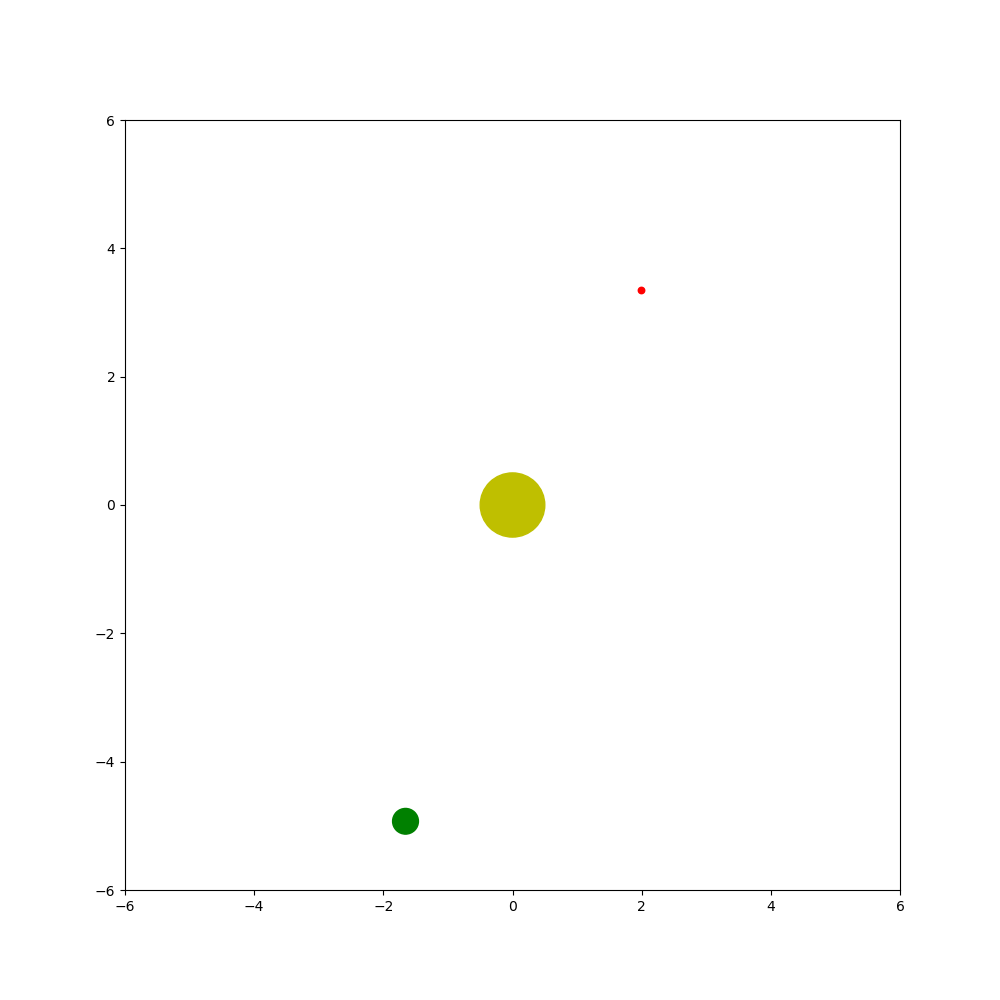

I'm going to start rendering now. This can take a long time...


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(width='500px'), max=1.0)

In [10]:
# Successful slingshot!
sol.animate(200)
sat.save_animation()